# Self Organizing Maps (SOM)
### Dataset: [Dry_Bean_Dataset.xlsx](../../input/Dry_Bean_Dataset_Citation_Request.txt)


<a id="1"></a>
## Import modules

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from minisom import MiniSom




<a id="2"></a>
## Loading dataset

In [18]:
filename = '../../input/Dry_Bean_Dataset.xlsx'
df = pd.read_excel(filename)
df_numeric = df.select_dtypes(include=[np.number])


# convert the filtered numeric DataFrame to a NumPy array
dataset_1 = df_numeric.to_numpy()

# apply standardization
epsilon = 1e-8
dataset_1 = (dataset_1 - np.mean(dataset_1, axis=0)) / (np.std(dataset_1, axis=0) + epsilon)


# print the shape and the minimum values for each column
print(dataset_1.shape)
print(np.min(dataset_1, axis=0))

(13611, 16)
[ -1.11271916  -1.54258281  -1.59340703  -1.77364529  -2.26365481
  -5.78209734  -1.11118419  -1.55167789  -3.96087928 -14.56942294
  -6.44620846  -2.58116691  -3.35612349  -1.93295838  -2.35625468
 -10.85033768]


<a id="3"></a>
## Standardize the data

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1.7040959197808996


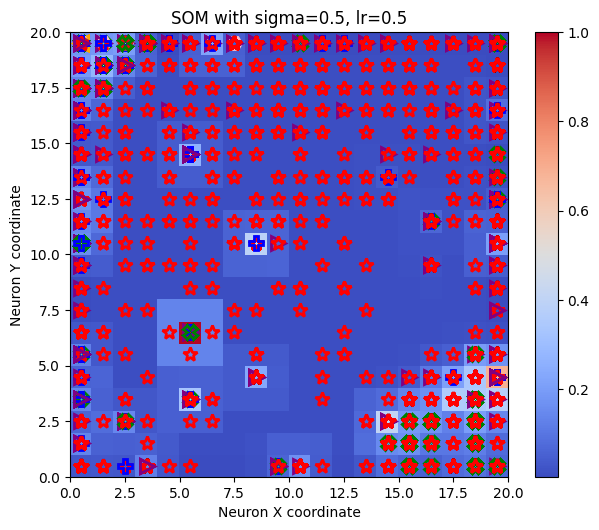

In [19]:
training_data = dataset_1[:, :-1] 
target = np.array(dataset_1[:, -1], dtype=np.uint8)  # ensure this is correct based on your data's last column

# define SOM parameters
parameters_to_try = [
    {"sigma": 0.5, "learning_rate": 0.5, "neighborhood_function": "gaussian", "topology": "rectangular"},
    # add other parameter sets as needed
]

plt.figure(figsize=(12, 10))

for i, params in enumerate(parameters_to_try):
    plt.subplot(2, 2, i + 1)
    n_neurons = 20
    m_neurons = 20
    som = MiniSom(n_neurons, m_neurons, training_data.shape[1], random_seed=42, **params)

    som.pca_weights_init(training_data)
    som.train(training_data, 5000, verbose=True)

    plt.pcolor(som.distance_map().T, cmap='coolwarm')  
    plt.colorbar()

    markers = ['*', 'X', 'P', '>', '<', 'p', 'H']
    colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink']
    # commenting out the original plotting loop
    # for cnt, xx in enumerate(training_data):
    #     w = som.winner(xx)
    #     plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
    #              markeredgecolor=colors[target[cnt]-1], markersize=10, markeredgewidth=2)

    # new plotting loop with modulo for wrapping around marker and color indices
    for cnt, xx in enumerate(training_data):
        w = som.winner(xx)
        marker_index = target[cnt] % len(markers)  # wrap around marker index
        color_index = target[cnt] % len(colors)    # wrap around color index
        plt.plot(w[0]+.5, w[1]+.5, markers[marker_index], markerfacecolor='None',
                 markeredgecolor=colors[color_index], markersize=10, markeredgewidth=2)

    plt.title(f'SOM with sigma={params["sigma"]}, lr={params["learning_rate"]}')
    plt.xlabel('Neuron X coordinate')
    plt.ylabel('Neuron Y coordinate')

plt.tight_layout()
plt.show()


### Connection to the First Plot with Data Points


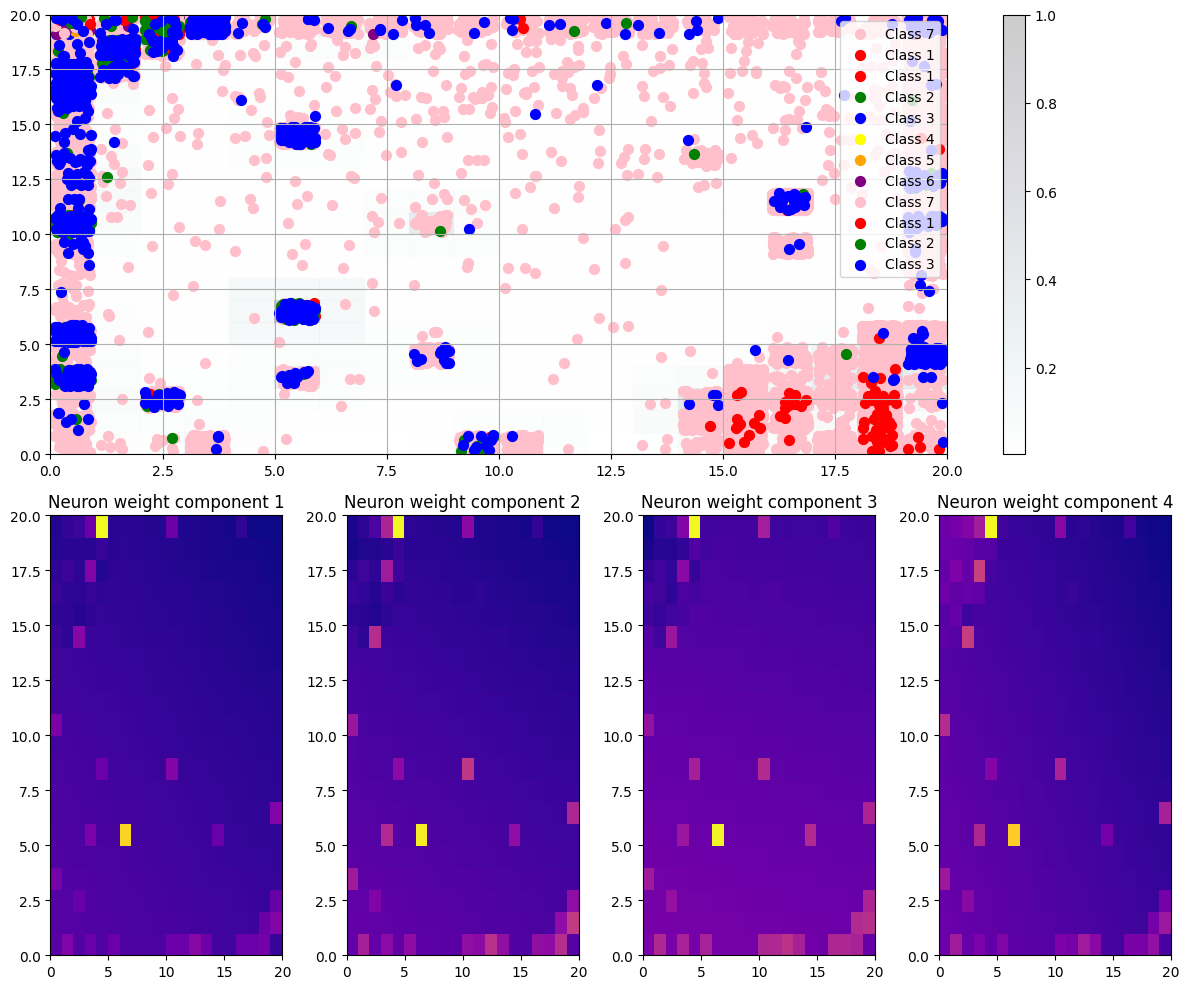

In [21]:
w_x, w_y = zip(*[som.winner(d) for d in training_data])
w_x = np.array(w_x)
w_y = np.array(w_y)

colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink']
label_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)  # SOM distance map and data points
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=0.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target == c
    plt.scatter(w_x[idx_target] + 0.5 + (np.random.rand(np.sum(idx_target)) - 0.5) * 0.8,
                w_y[idx_target] + 0.5 + (np.random.rand(np.sum(idx_target)) - 0.5) * 0.8,
                s=50, c=colors[(c-1) % len(colors)], label=label_names[(c-1) % len(label_names)])


plt.legend(loc='upper right')
plt.grid()

w = som.get_weights()
for i in range(4):
    plt.subplot(2, 4, 5 + i)
    plt.pcolor(w[:, :, i], cmap='plasma')
    plt.title(f'Neuron weight component {i+1}')

plt.tight_layout()
plt.show()